## Structure
Below is the code I used to salvage the data from Arxiv.
You don't need to run it. The data is collected and stored in the file 'arxived.txt'. Just run the cell below and it'll store the data in the list named 'arxiv_publications'.
## Cleanup needed
The list it'll load will have repeated entries and it may even have some garbage data, namely some publincations listed there may be may be of someone not related to A&M. To cleanup the repeated entry I think you can make the list a set and then convert it back into a list, and that should remove repetations. To clean up the ghost entries, I don't know how I'd do that.

In [236]:
Categories = {
    "math.AG" : 'Algebraic Geometry',
    "math.AT" : 'Algebraic Topology',
    "math.AP" : 'Analysis of PDEs',
    "math.CT" : 'Category Theory',
    "math.CA" : 'Classical Analysis and ODEs',
    "math.CO" : 'Combinatorics',
    "math.AC" : 'Commutative Algebra',
    "math.CV" : 'Complex Variables',
    "math.DG" : 'Differential Geometry',
    "math.DS" : 'Dynamical Systems',
    "math.FA" : 'Functional Analysis',
    "math.GM" : 'General Math',
    "math.GN" : 'Genral Topology',
    "math.GT" : 'Geometric Topology',
    "math.GR" : 'Group Theory',
    "math.HO" : 'History and Overview',
    "math.IT" : 'Information Theory',
    "math.KT" : 'K-Theory and Homology',
    "math.LO" : 'Logic',
    "math.MP" : 'Mathematical Physics',
    "math.MG" : 'Metric Geometry',
    "math.NT" : 'Number Theory',
    "math.NA" : 'Numerical Analysis',
    "math.OA" : 'Operator Algebras',
    "math.OC" : 'Optimization and Control',
    "math.PR" : 'Probability',
    "math.QA" : 'Quantam Algebra',
    "math.RT" : 'Representation Theory',
    "math.RA" : 'Rings and Algebras',
    "math.SP" : 'Spectral Theory',
    "math.ST" : 'Statistics Theory',
    "math.SG" : 'Symplectic Geometry',
    "stat.AP" : 'Applications',
    "stat.CO" : 'Computation',
    "stat.ME" : 'Methodology',
    "stat.ML" : 'Machine Learning',
    "stat.OT" : 'Other Statistics',
    "stat.TH" : 'Statistics Theory',
    "cs.AI" : 'Artificial Intelligence',
    "cs.AR" : 'Hardware Architecture',
    "cs.CC" : 'Computational Complexity',
    "cs.CE" : 'Computational Engineering, Finance, and Science',
    "cs.CG" : 'Computational Geometry',
    "cs.CL" : 'Computation and Language',
    "cs.CR" : 'Cryptography and Security',
    "cs.CV" : 'Computer Vision and Pattern Recognition',
    "cs.CY" : 'Computers and Society',
    "cs.DB" : 'Databases',
    "cs.DC" : 'Distributed, Parallel, and Cluster Computing',
    "cs.DL" : 'Digital Libraries',
    "cs.DM" : 'Discrete Mathematics',
    "cs.DS" : 'Data Structures and Algorithms',
    "cs.ET" : 'Emerging Technologies',
    "cs.FL" : 'Formal Languages and Automata Theory',
    "cs.GL" : 'General Literature',
    "cs.GR" : 'Graphics',
    "cs.GT" : 'Computer Science and Game Theory',
    "cs.HC" : 'Human-Computer Interaction',
    "cs.IR" : 'Information Retrieval',
    "cs.IT" : 'Information Theory',
    "cs.LG" : 'Machine Learning',
    "cs.LO" : 'Logic in Computer Science',
    "cs.MA" : 'Multiagent Systems',
    "cs.MM" : 'Multimedia',
    "cs.MS" : 'Mathematical Software',
    "cs.NA" : 'Numerical Analysis',
    "cs.NE" : 'Neural and Evolutionary Computing',
    "cs.NI" : 'Network and Internet Architecture',
    "cs.OH" : 'Other Computer Science',
    "cs.OS" : 'Operating Systems',
    "cs.PF" : 'Performance',
    "cs.PL" : 'Programming Language',
    "cs.RO" : 'Robotics',
    "cs.SC" : 'Symbolic Computation',
    "cs.SD" : 'Sound',
    "cs.SE" : 'Software Engineering',
    "cs.SI" : 'Social and Information Networks',
    "cs.SY" : 'Systems and Control'
}


In [243]:
import feedparser as fp
import urllib
import requests
import string
import json
import time
import pandas as pd
def refine_texts(text):
    text = unidecode.unidecode(text) 
    text = text.lower() 
    text = text.replace(',','')
    for s in text:
        if s not in string.ascii_lowercase+string.digits:
            text = text.replace(s,' ')
        else:
            continue
    return text

In [244]:
df = pd.read_excel('Dimensions_Stat.xlsx')
df.set_axis(df.iloc[0,:],axis = 1,inplace = True)
df = df.drop(index=0,axis=1)

In [245]:
#outfile = open('dimensions_arxiv_stat.txt','r')
#arxiv_publications = json.loads(outfile.read())
#outfile.close()
arxiv_publications = []
outfile.close()
max_results = 4
for i in range(1,df.shape[0]):
    arxiv_url = 'http://export.arxiv.org/api/query?search_query='
    name = refine_texts(df['Authors'][i]).split()
    last_name = 'au:%s'%name[0]
    title_url = '+AND+ti:'
    title = refine_texts(df['Title'][i]).split()
    title_url+= title[0]
    for j in title[1:5]:
        title_url+= '+AND+ti:%s'%j
    webURL = arxiv_url+last_name+title_url
    webURL+='&max_results=%i'%max_results
    data = urllib.request.urlopen(webURL).read()
    feed = fp.parse(data)
    arxiv_publications = arxiv_publications + feed['entries']
    outfile = open('dimensions_arxiv_stat.txt','w')
    outfile.write(json.dumps(arxiv_publications))
    outfile.close()
    for pub in feed['entries']:
        print(pub['title']+'   %i\n'%i)
    time.sleep(3)

Partially-Averaged Navier-Stokes Simulations of Turbulence Within a
  High-Order Flux Reconstruction Framework   2

A Wavelet-Based Independence Test for Functional Data with an
  Application to MEG Functional Connectivity   4

BAGEL: A Bayesian Graphical Model for Inferring Drug Effect
  Longitudinally on Depression in People with HIV   5

Hypercontractivity and Lower Deviation Estimates in Normed Spaces   6

Robust Importance Sampling for Error Estimation in the Context of
  Optimal Bayesian Transfer Learning   8

Distributed Networked Learning with Correlated Data   9

Statistical Random Number Generator Attack against the
  Kirchhoff-Law-Johnson-Noise (KLJN) Secure Key Exchange Protocol   11

High-Dimensional Linear Regression via Implicit Regularization   13

Defense Against Explanation Manipulation   14

Valid Two-Sample Graph Testing via Optimal Transport Procrustes and
  Multiscale Graph Correlation with Applications in Connectomics   17

Hierarchical sparse Cholesky decomposit

Nonparametric Universal Copula Modeling   256

A hypothesis-testing perspective on the G-normal distribution theory   258

Direction Selection in Stochastic Directional Distance Functions   259

Eigen Value Analysis in Lower Bounding Uncertainty of Kalman Filter
  Estimates   261

Products of Many Large Random Matrices and Gradients in Deep Neural
  Networks   268

Estimating Average Treatment Effects with a Double-Index Propensity
  Score   269

Robust and Efficient Semi-Supervised Estimation of Average Treatment
  Effects with Application to Electronic Health Records Data   269

Piecewise Stationary Modeling of Random Processes Over Graphs With an
  Application to Traffic Prediction   272

One Dimensional Localization for Arbitrary Disorder Correlations   273

Bayesian Double Feature Allocation for Phenotyping with Electronic
  Health Records   278

A Conditional Density Estimation Partition Model Using Logistic Gaussian
  Processes   279

On Variable Ordination of Modified Cholesky 

MaxWeight Scheduling: Asymptotic Behavior of Unscaled
  Queue-Differentials in Heavy Traffic   794

The Mahler measure of the Rudin-Shapiro polynomials   796

The asymptotic value of the Mahler measure of the Rudin-Shapiro
  polynomials   796

Improved lower bounds for the Mahler measure of the Fekete polynomials   796

MaxWeight Scheduling: Asymptotic Behavior of Unscaled
  Queue-Differentials in Heavy Traffic   798

Semiparametric analysis of clustered interval-censored survival data
  using Soft Bayesian Additive Regression Trees (SBART)   807

Covariance models on the surface of a sphere: when does it matter?   827

The ISO Problem: Decentralized Stochastic Control via Bidding Schemes   830

Performance and Robustness Analysis of Stochastic Jump Linear Systems
  using Wasserstein metric   836

Sequential Experimental Design for Optimal Structural Intervention in
  Gene Regulatory Networks Based on the Mean Objective Cost of Uncertainty   847

Discussions on non-probabilistic convex

Variable selection in measurement error models   1355

A Unified Framework for Analyzing and Detecting Malicious Examples of
  DNN Models   1357

Moments of the Wigner delay times   1384

Use of multiple singular value decompositions to analyze complex
  intracellular calcium ion signals   1386

Asymptotic Capacity of Large Fading Relay Networks with Random Node
  Failures   1391

Search for Standard Model Higgs Boson Production in Association with a W
  Boson using a Neural Network   1403

A Search for the Associated Production of the Standard-Model Higgs Boson
  in the All-Hadronic Channel   1403

Search for Standard Model Higgs Boson Production in Association with a W
  Boson at CDF   1403

Search for Standard Model Higgs Boson Production in Association with a W
  Boson Using a Matrix Element Technique at CDF in p-bar{p} Collisions at
  sqrt{s} = 1.96 TeV   1403

First Observation of Electroweak Single Top Quark Production   1409

Search for a Fermiophobic Higgs Boson Decaying into 

Discussion: Foundations of Statistical Inference, Revisited   2259

Ideas for Improving the Field of Machine Learning: Summarizing
  Discussion from the NeurIPS 2019 Retrospectives Workshop   2259

Critical Risk Indicators (CRIs) for the electric power grid: A survey
  and discussion of interconnected effects   2259

Discussion: Conditional growth charts   2350

Reply to the Discussion of "Estimating the Distribution of Dietary
  Consumption Patterns"   2350

An Analysis of Beamed Wireless Power Transfer in the Fresnel Zone Using
  a Dynamic, Metasurface Aperture   2437

Analysis of the emission of very small dust particles from Spitzer
  spectro-imagery data using blind signal separation methods   2437

Analysis of Previously Classified White Dwarf-Main Sequence Binaries
  Using Data from the APOGEE Survey   2437

Analysis of Early Science observations with the CHaracterising
  ExOPlanets Satellite (CHEOPS) using pycheops   2437



In [398]:
arxiv_publications = []
outfile = open('dimensions_arxiv_math.txt','r')
arxiv_publications = json.loads(outfile.read())
outfile.close()

outfile = open('dimensions_arxiv_stat.txt','r')
arxiv_publications+= json.loads(outfile.read())
outfile.close()

outfile = open('dimensions_arxiv_cs1.txt','r')
arxiv_publications+= json.loads(outfile.read())
outfile.close()

outfile = open('dimensions_arxiv_cs2.txt','r')
arxiv_publications+= json.loads(outfile.read())
outfile.close()

arxiv_pub_id = []
arxiv_pubs_clean = []
for i in arxiv_publications:
    if i['id'] not in arxiv_pub_id:
        arxiv_pubs_clean.append(i)
        arxiv_pub_id.append(i['id'])
vizfile = open('vizfile_math_stat_cs.ris','w')
for article in arxiv_pubs_clean:
    vizfile.write('\nTY  - JOUR')
    Author = refine_texts(article['author'])
    vizfile.write('\nAU  - %s'%Author)
    vizfile.write('\nPY  - %s'%article['published'][:4])
    Title = refine_texts(article['title'])
    vizfile.write('\nTI  - %s'%Title)
    for tags in article['tags']:
        if tags['term'] in Categories.keys():
            vizfile.write('\nKW  - %s'%Categories[tags['term']])
        else:
            continue
    vizfile.write('\nER  - \n')
vizfile.close()

In [256]:
df_math = pd.read_excel('Dimensions_Math.xlsx')
df_math.set_axis(df_math.iloc[0,:],axis = 1,inplace = True)
df_math = df_math.drop(index=0,axis=1)

df_stat = pd.read_excel('Dimensions_Stat.xlsx')
df_stat.set_axis(df_stat.iloc[0,:],axis = 1,inplace = True)
df_stat = df_stat.drop(index=0,axis=1)

df_cs1 = pd.read_excel('Dimensions_ComSc_1.xlsx')
df_cs1.set_axis(df_cs1.iloc[0,:],axis = 1,inplace = True)
df_cs1 = df_cs1.drop(index=0,axis=1)

df_cs2 = pd.read_excel('Dimensions_ComSc_2.xlsx')
df_cs2.set_axis(df_cs2.iloc[0,:],axis = 1,inplace = True)
df_cs2 = df_cs2.drop(index=0,axis=1)

df_cs = pd.concat([df_cs1,df_cs2],axis=0)


In [327]:
ID_Categories = set()
def extract_categories(cats):
    for i in string.digits:
        cats = cats.replace(i,'')
    cats = cats.split(';')
    return set([j.rstrip().lstrip() for j in cats])
for cats in df_cs['FOR (ANZSRC) Categories']:
    ID_Categories = ID_Categories.union(extract_categories(cats))
for cats in df_math['FOR (ANZSRC) Categories']:
    ID_Categories = ID_Categories.union(extract_categories(cats))
for cats in df_stat['FOR (ANZSRC) Categories']:
    ID_Categories = ID_Categories.union(extract_categories(cats))

In [369]:
def extract_category_key(cats):
    cats.lower()
    for i in cats:
        if i not in string.digits+';':
            cats = cats.replace(i,'')
    return cats.split(';')

In [399]:
math_cs_colab_data = {}
math_pubs_yearly = []
cs_pubs_yearly = []
for PubYear in range(1990,2022):
    math_pubs = df_math.loc[df_math['PubYear']==PubYear]
    cs_pubs = df_cs.loc[df_cs['PubYear']==PubYear]
    
    math_pubs_yearly.append(math_pubs.shape[0])
    cs_pubs_yearly.append(cs_pubs.shape[0])
    math_cs_colab_data[str(PubYear)]=0
    for cats in math_pubs['FOR (ANZSRC) Categories']:
        if '08' in extract_category_key(cats):
            math_cs_colab_data[str(PubYear)]+=1
    for pub_id in cs_pubs['Publication ID']:
        if pub_id not in list(math_pubs):
            cats = list(cs_pubs.loc[cs_pubs['Publication ID']==pub_id]['FOR (ANZSRC) Categories'])[0]
            if '01' in extract_category_key(cats):
                math_cs_colab_data[str(PubYear)]+=1

In [386]:
import matplotlib.pyplot as plt

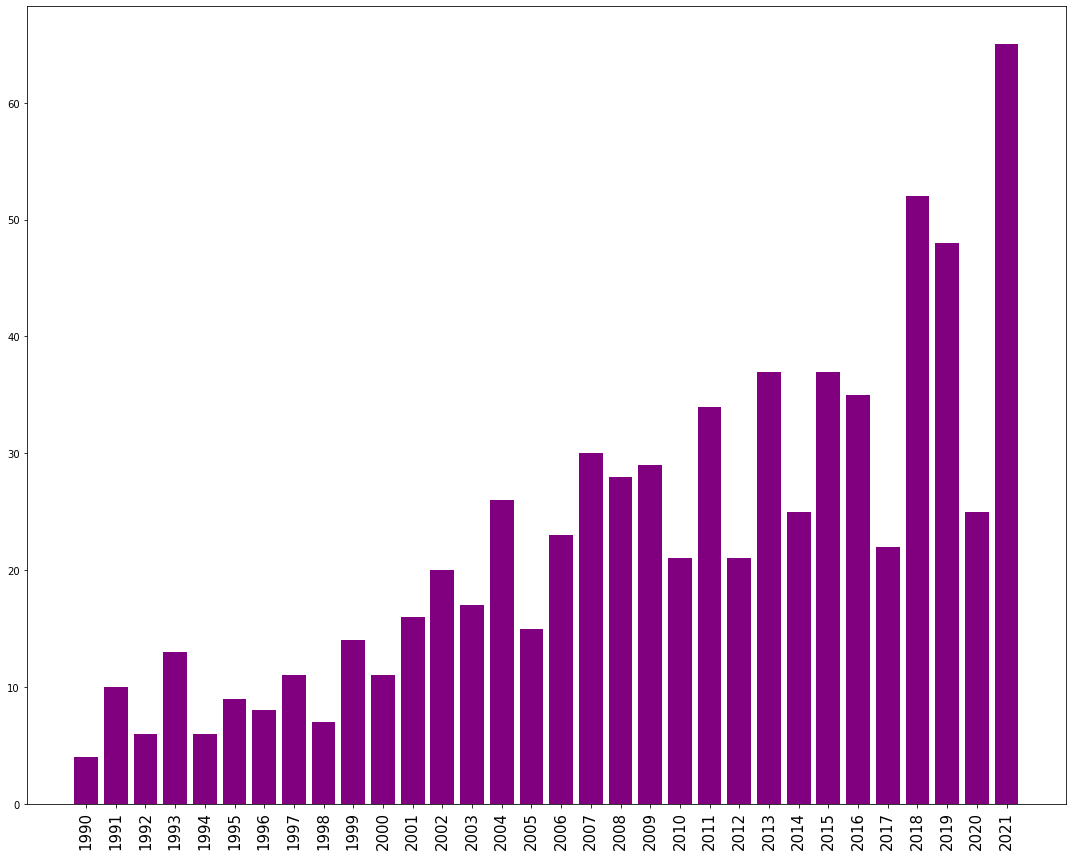

In [410]:
X=math_cs_colab_data.keys()
Y=math_cs_colab_data.values()
plt.figure(figsize=(15, 12))
plt.bar(X, Y,color='purple')
#plt.plot(math_pubs_yearly)
#plt.plot(cs_pubs_yearly)
plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tight_layout()

In [403]:
stat_cs_colab_data = {}
stat_pubs_yearly = []
for PubYear in range(1990,2022):
    stat_pubs = df_stat.loc[df_stat['PubYear']==PubYear]
    cs_pubs = df_cs.loc[df_cs['PubYear']==PubYear]
    stat_pubs_yearly.append(stat_pubs.shape[0])
    stat_cs_colab_data[str(PubYear)]=0
    for cats in stat_pubs['FOR (ANZSRC) Categories']:
        if '08' in extract_category_key(cats):
            stat_cs_colab_data[str(PubYear)]+=1
    for pub_id in cs_pubs['Publication ID']:
        if pub_id not in list(stat_pubs):
            cats = list(cs_pubs.loc[cs_pubs['Publication ID']==pub_id]['FOR (ANZSRC) Categories'])[0]
            if '0104' in extract_category_key(cats):
                math_cs_colab_data[str(PubYear)]+=1
                


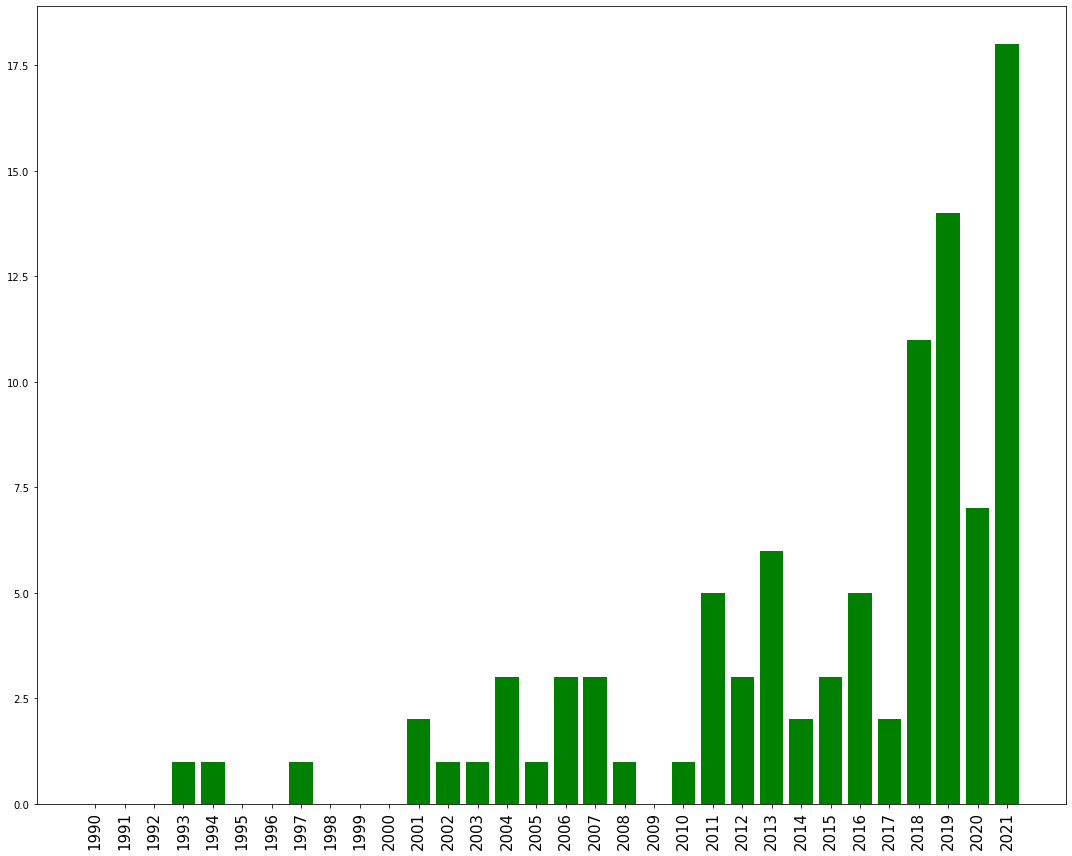

In [411]:
X=stat_cs_colab_data.keys()
Y=stat_cs_colab_data.values()
plt.figure(figsize=(15, 12))
plt.bar(X, Y, color='green')
#plt.plot(cs_pubs_yearly)
#plt.plot(stat_pubs_yearly)
plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tight_layout()

In [395]:
math_stat_colab_data = {}
for PubYear in range(1990,2022):
    stat_pubs = df_stat.loc[df_stat['PubYear']==PubYear]
    math_pubs = df_math.loc[df_math['PubYear']==PubYear]
    math_stat_colab_data[str(PubYear)]=0
    for cats in stat_pubs['FOR (ANZSRC) Categories']:
        if any(c in extract_category_key(cats) for c in ('0101','0102','0103','0105')):
            stat_cs_colab_data[str(PubYear)]+=1
    for pub_id in math_pubs['Publication ID']:
        if pub_id not in list(stat_pubs):
            cats = list(math_pubs.loc[math_pubs['Publication ID']==pub_id]['FOR (ANZSRC) Categories'])[0]
            if '0104' in extract_category_key(cats):
                math_stat_colab_data[str(PubYear)]+=1
                


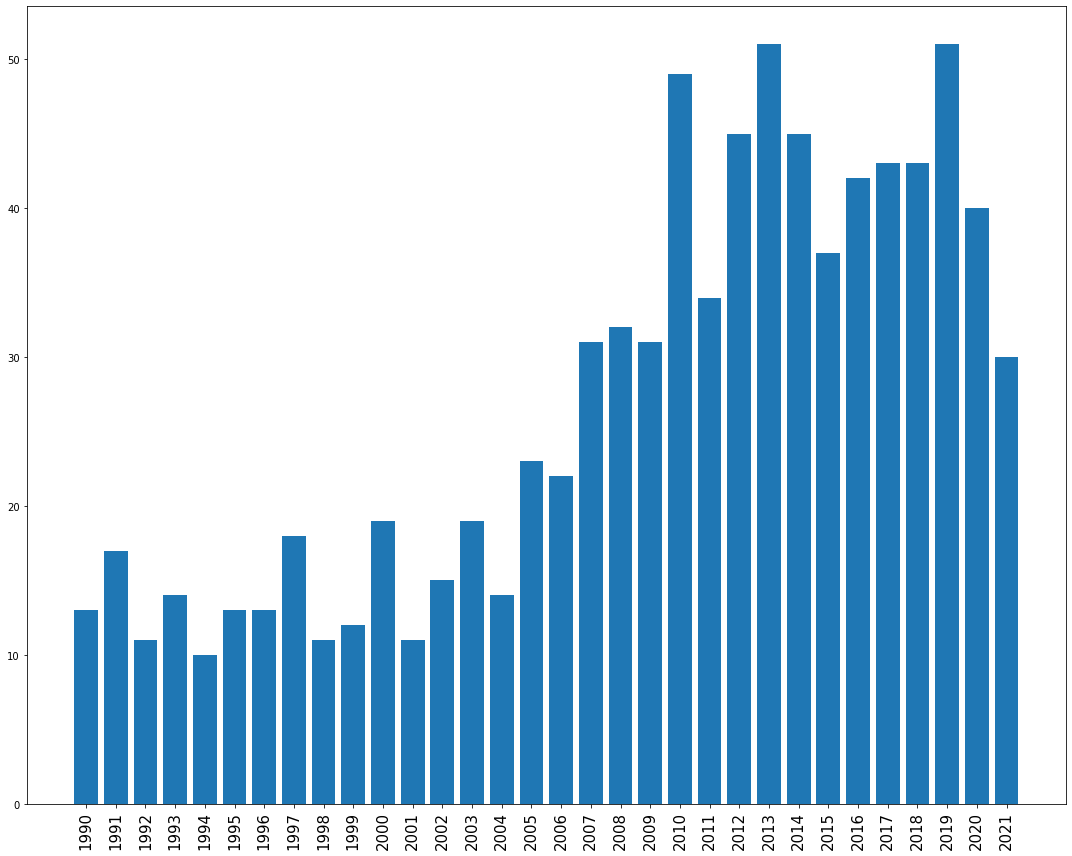

In [413]:
X=math_stat_colab_data.keys()
Y=math_stat_colab_data.values()
plt.figure(figsize=(15, 12))
plt.bar(X, Y)
#plt.plot(math_pubs_yearly)
#plt.plot(stat_pubs_yearly)
plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tight_layout()